In [1]:
import sys
sys.path.append('../../dataset/')
sys.path.append('../../network/')
sys.path.append('../../model/')
sys.path.append('../')

from utils import *
from main_loading import *
from main_network import *
from main_model_rec import *
from main_model_one_class import *
from gaussian3d_loader import *

In [2]:
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%matplotlib notebook

# 1. Get Source Data

In [3]:
random_state = 42
normal_mu = [1, - 1, 1]
abnormal_mu = [1, 1, 1]
cov = [[0.1, 0, 0],
       [0, 0.1, 0],
       [0, 0, 0.1]]
split = 0.2
ratio_abnormal = 0.1

In [4]:
# Set random seed
np.random.seed(random_state)

# Generate X_normal
X_normal = np.random.multivariate_normal(normal_mu, cov, 6000)
y_normal = np.zeros(X_normal.shape[0])
        
# Generate X_abnormal
X_abnormal = np.random.multivariate_normal(abnormal_mu, cov, int(6000 * ratio_abnormal))
y_abnormal = np.ones(X_abnormal.shape[0])

# Concatenate
X = np.vstack((X_normal, X_abnormal))
y = np.hstack((y_normal, y_abnormal))

# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split,
                                                    random_state=random_state,
                                                    stratify=y)

In [5]:
X_train_normal = X_train[y_train == 0]
X_train_abnormal = X_train[y_train == 1]

# 2. Get Test Data

In [42]:
root = Path('../report')
root_oc = root / 'one_class' / 'one_class_[1_-1_1]_[1_1_1]_[0.1]_[60]'
root_rec = root / 'rec' / 'rec_[1_-1_1]_[1_1_1]_[0.1]_[60]'

oc_d0i = pd.read_pickle(root_oc / 'df_d0i.pkl')
oc_d1i = pd.read_pickle(root_oc / 'df_d1i.pkl')
rec_d0i = pd.read_pickle(root_rec / 'df_d0i.pkl')
rec_d1i = pd.read_pickle(root_rec / 'df_d1i.pkl')

In [43]:
oc_d1i

,d0i,d1i,recall,mu
0,2.5,0.254883,1.000000,"[1.0552280604148414, 1.4987793485411318, 0.944..."
1,2.5,1.311335,1.000000,"[1.7700208922052043, 1.2346663524095365, 1.814..."
2,2.5,2.240430,1.000000,"[2.495784872470597, 1.0023925655677384, 0.9447..."
3,2.5,2.240430,1.000000,"[1.0442569119398115, 1.0023925655677384, -0.49..."
4,2.5,3.831545,1.000000,"[2.1986446542678832, 0.6046138643581589, -0.49..."
5,2.5,4.760640,1.000000,"[2.9244086345332763, 0.3723400775163612, 1.814..."
6,2.5,4.760640,0.946667,"[1.4728806740024902, 0.3723400775163612, 3.035..."
7,2.5,6.878907,0.981667,"[2.181806443651396, -0.15722663191893504, 3.03..."
8,2.5,7.202638,1.000000,"[3.3804510979192792, -0.23815950372290584, 0.9..."
9,2.5,7.202638,0.951667,"[1.0168382106164873, -0.23815950372290584, -1...."


In [18]:
oc_d0i.iloc[[8, 9]]

,d0i,d1i,recall,mu
8,7.368183,2.5,0.991667,"[0.7517459947908512, 0.2795456877760323, -1.38..."
9,7.368183,2.5,0.190000,"[-1.251135594543725, 0.2795456877760323, 1.814..."


In [19]:
oc_d0i.iloc[[10, 11]]

,d0i,d1i,recall,mu
10,8.480235,2.5,0.993333,"[0.37957248171048286, 0.5575588608033774, -1.3..."
11,8.480235,2.5,0.066667,"[-0.3824540710450588, 0.5575588608033774, 3.03..."


In [23]:
test_mu_1 = oc_d0i.iloc[[8, 9]]['mu'][8]
test_mu_2 = oc_d0i.iloc[[8, 9]]['mu'][9]

In [24]:
X_test_1 = np.random.multivariate_normal(test_mu_1, cov, 600)
X_test_2 = np.random.multivariate_normal(test_mu_2, cov, 600)

In [22]:
oc_d0i.iloc[[8, 9]]['mu'][8]

[0.7517459947908512, 0.2795456877760323, -1.3810324510378909]

# 3. 3D Visualization

<IPython.core.display.Javascript object>


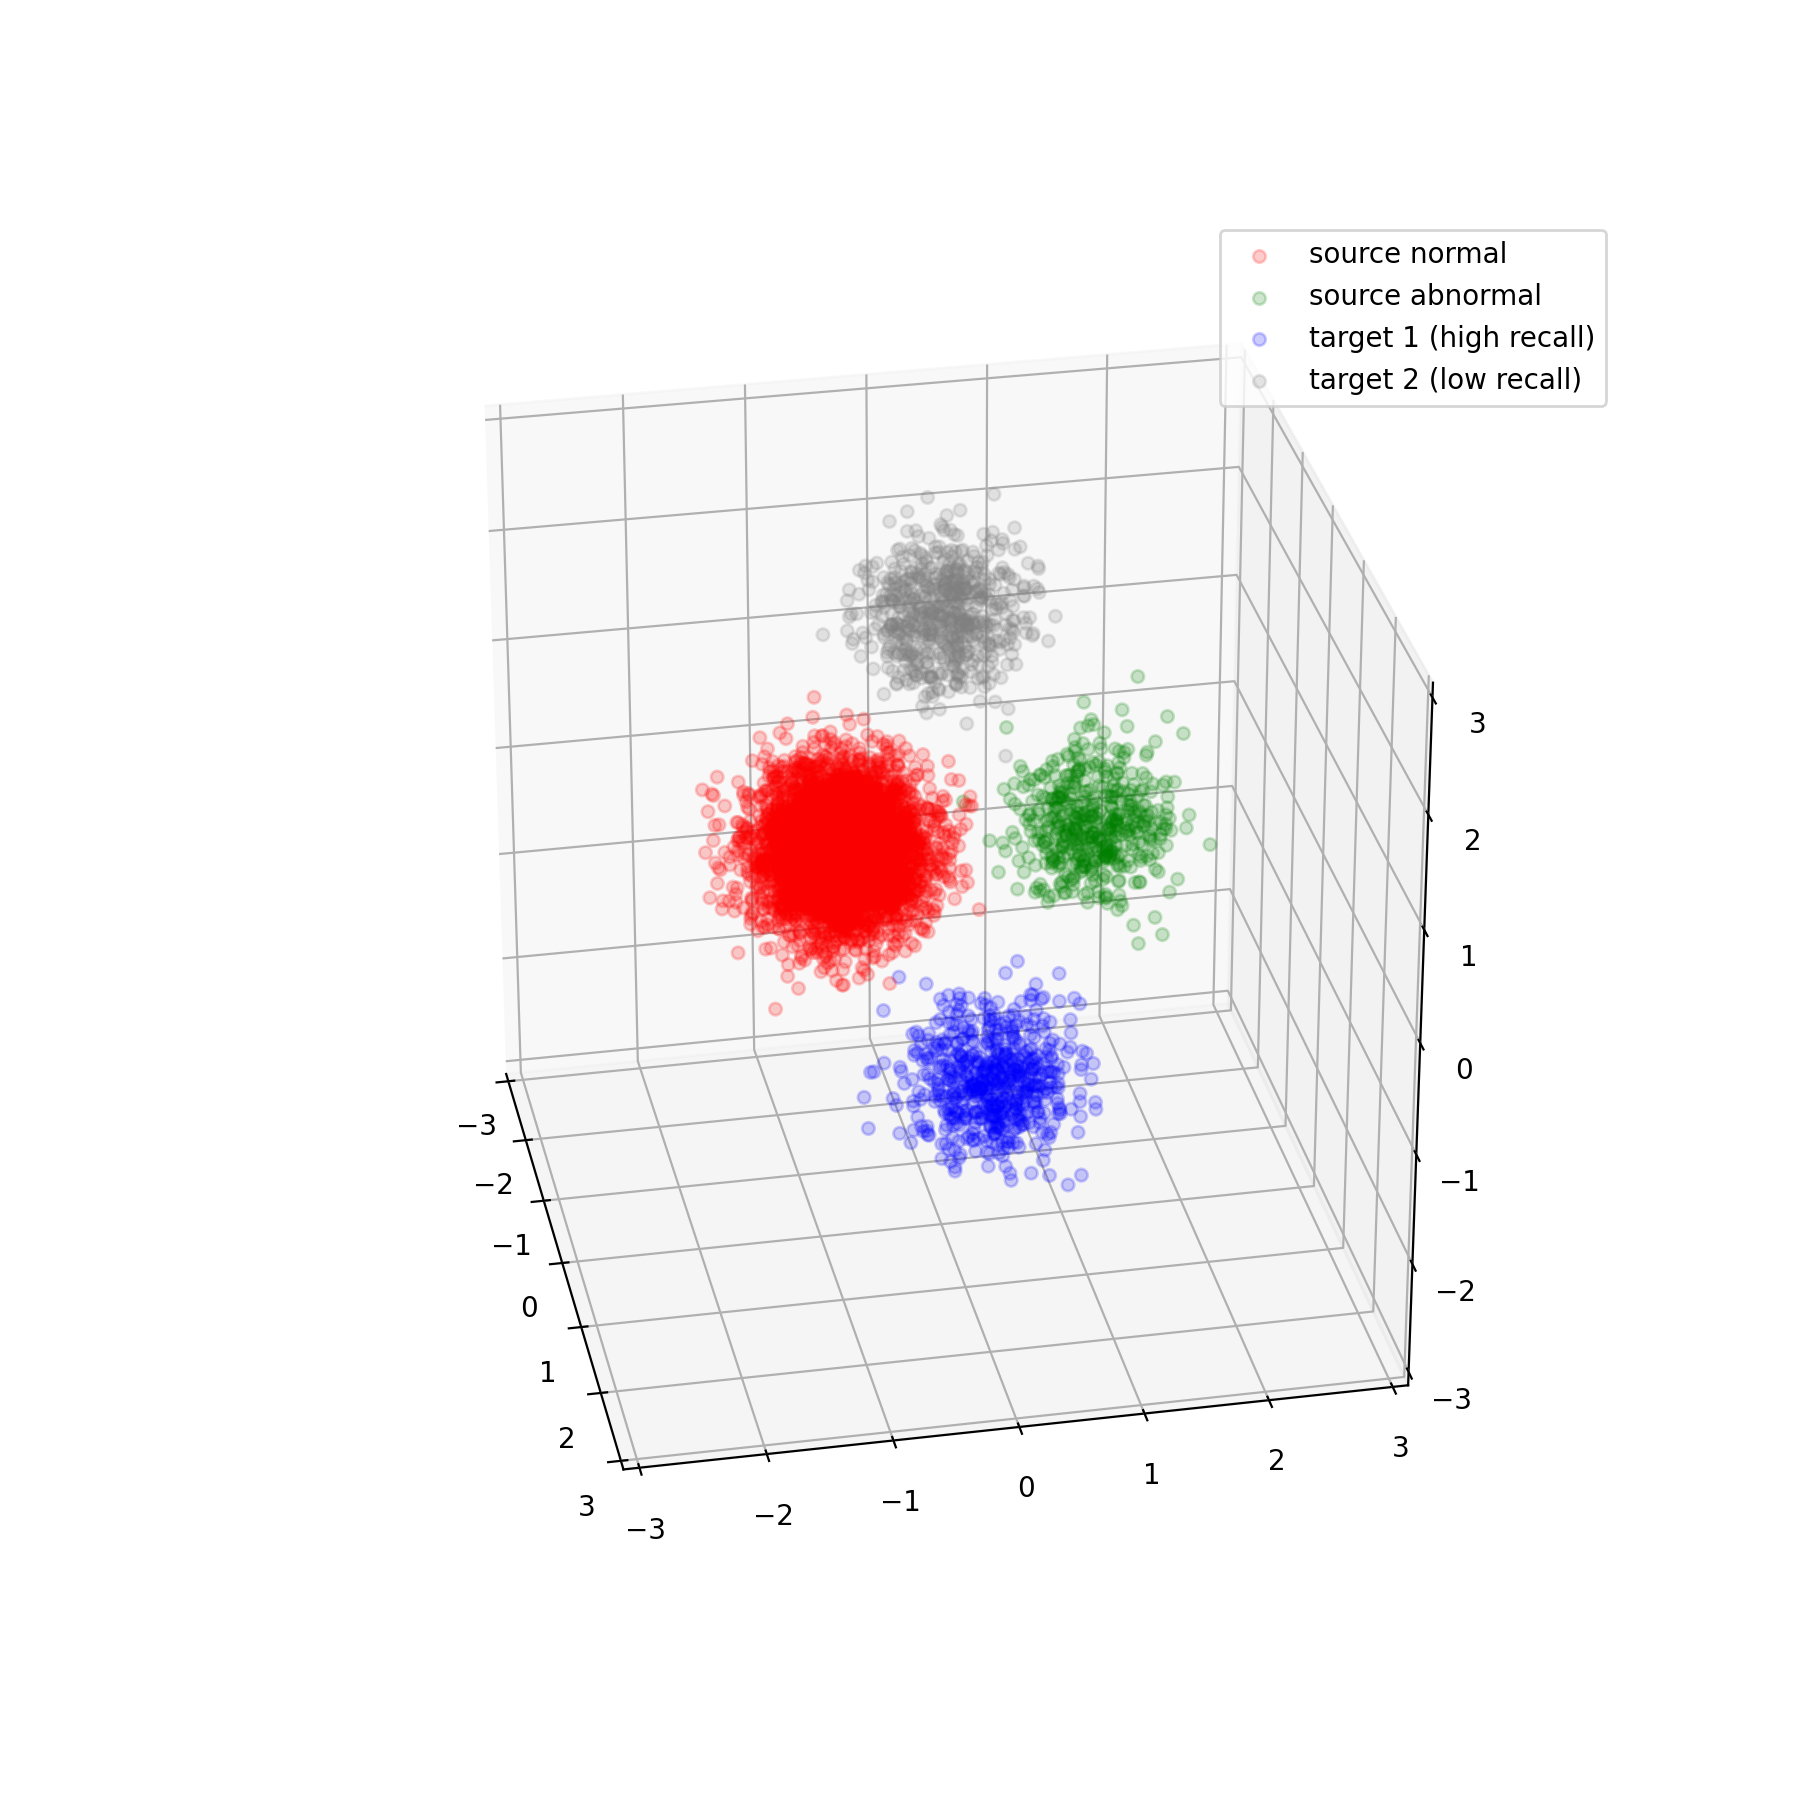

In [34]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_train_normal.T, color='red', alpha=0.2, label='source normal')
ax.scatter(*X_train_abnormal.T, color='green', alpha=0.2, label='source abnormal')
ax.scatter(*X_test_1.T, color='blue', alpha=0.2, label='target 1 (high recall)')
ax.scatter(*X_test_2.T, color='gray', alpha=0.2, label='target 2 (low recall)')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
plt.legend()

# 4. Get Latent Space

In [49]:
oc_model_path = root_oc / 'model.tar'
loader_eval_name = 'gaussian3d_eval'
normal_mu_str = '1_-1_1'
abnormal_mu_str = '1_1_1'
ratio_abnormal = 0.1

In [74]:
class OneClassEncoder:
    def __init__(self):
        self.net = None
        self.net_name = None

    def set_network(self, net_name):
        self.net_name = net_name
        self.net = build_network(net_name)

    def load_model(self, model_path, map_location):
        model_dict = torch.load(model_path, map_location=map_location)
        self.c = model_dict['c']
        self.net.load_state_dict(model_dict['net_dict'])

    def get_latent(self, dataset, device, batch_size, n_jobs_dataloader):
        all_loader = dataset.loaders(batch_size=batch_size,
                                     num_workers=n_jobs_dataloader)
        net = self.net.to(device)
        net.eval()
        
        X_pred_list = []
        with torch.no_grad():
            for data in all_loader:
                X, y, idx = data
                X, y, idx = X.to(device), y.to(device), idx.to(device)

                X_pred = net(X).numpy()
                X_pred_list.extend(X_pred)
        
        return np.array(X_pred_list)

In [75]:
encoder = OneClassEncoder()
encoder.set_network('gaussian3d_one_class')
encoder.load_model(oc_model_path, map_location='cpu')

In [ ]:
dataset_test_1 = load_dataset(loader_name=loader_eval_name,
                              abnormal_mu_test=[1, - 1, 1],
                              normal_mu_train=normal_mu_str,
                              abnormal_mu_train=abnormal_mu_str,
                              ratio_abnormal=ratio_abnormal)

In [51]:
dataset_test_1 = load_dataset(loader_name=loader_eval_name,
                              abnormal_mu_test=test_mu_1,
                              normal_mu_train=normal_mu_str,
                              abnormal_mu_train=abnormal_mu_str,
                              ratio_abnormal=ratio_abnormal)

dataset_test_2 = load_dataset(loader_name=loader_eval_name,
                              abnormal_mu_test=test_mu_2,
                              normal_mu_train=normal_mu_str,
                              abnormal_mu_train=abnormal_mu_str,
                              ratio_abnormal=ratio_abnormal)

[0.7517459947908512, 0.2795456877760323, -1.3810324510378909]
[-1.251135594543725, 0.2795456877760323, 1.81445326383787]


In [76]:
latent_test_1 = encoder.get_latent(dataset_test_1, 'cpu', 600, 0)

In [77]:
latent_test_1

array([[0.7342416 , 0.57553583],
       [0.7165009 , 0.48007196],
       [0.63841045, 0.43975335],
       ...,
       [0.6098954 , 0.32351667],
       [0.75928336, 0.5625149 ],
       [0.7346669 , 0.49920452]], dtype=float32)